# Cleaning the text 
- londonvenues csv undergoes EDA and cleaning of tips column. This will then be modelled against ABSA labeled training data to determine the sentiment.


In [425]:
import pandas as pd
import numpy as np

In [550]:
df = pd.read_csv('./londonvenues_cleaned.csv', encoding='utf-8')
print df.shape
df.head()

(3700, 4)


,rating,tips,cat_name,cat_parent
0,9.3,Great fun to be had by everyone. The aquarium ...,Aquarium,NaN
1,7.5,Enter our prize draw to win a family ticket to...,Aquarium,NaN
2,6.3,"If you're pressed for time, head to Hall 2 for...",Aquarium,NaN
3,7.7,Sea lion shows at 12pm and 3pm daily,Aquarium,NaN
4,7.5,The Penguin auditorium is over rated. ...not t...,Aquarium,NaN


In [427]:
tip = df.tips[2]
tip

u"If you're pressed for time, head to Hall 2 for the corals; the Amazonian exhibit in Hall 3 is not that exciting."

# Text Pre-processing

Of all data text is the most unstructured form. In this case public reviews are not like articles so can contain errors like mispellings, slangs and a range of different writing styles. Therefore, various types of noise are present in the text which will need to be removed through cleaning and standardisation to minimize the noise as much as possible. These pre-processing steps help convert noise from high dimensional features (where N different features) to the low dimensional space.  

#### Decoding 
Throughout this work  Unicode string, make sure you are not using an encoded version of the string (it may be necessary to decode it first, e.g. with ``s.decode("utf8")``........


### Noise Removal

#### Apostrophes
Apostrophes connecting words are used everywhere, espcially in public reviews. To maintain uniform structure throughout the whole text it is recommended to remove them inplace of the actual word. I found a dictionary of the most common apostrophe joined words. All the apostrophes in the texts should be converted into standard lexicons. This allows the text to follow the rules of context free grammar and helps avoids any word-sense disambiguation.


In [551]:
# %load ./NLP/appos.py
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

In [429]:
df.tips[2]

u"If you're pressed for time, head to Hall 2 for the corals; the Amazonian exhibit in Hall 3 is not that exciting."

In [430]:
words = df.tips[2].split()
reformed = [appos[word] if word in appos else word for word in words]
reformed = " ".join(reformed) 
reformed

u'If you are pressed for time, head to Hall 2 for the corals; the Amazonian exhibit in Hall 3 is not that exciting.'

#### Lowercasing 
Normalising the case ensures that the words are treated equally. For example, 'Apple' and 'apple' are identified as the same word. 

In [431]:
df.tips[2]

u"If you're pressed for time, head to Hall 2 for the corals; the Amazonian exhibit in Hall 3 is not that exciting."

In [432]:
lower_case = df.tips[2].lower()
lower_case

u"if you're pressed for time, head to hall 2 for the corals; the amazonian exhibit in hall 3 is not that exciting."

#### Tokenizing 
Tokenization is the process of converting text into tokens, normally these are words. These tokens split at white space and punctuation so  will now be easier to filter out unesseary tokens .... look up more? 


In [433]:
import nltk

In [434]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(df.tips[2])
print(tokens[:100])

[u'If', u'you', u"'re", u'pressed', u'for', u'time', u',', u'head', u'to', u'Hall', u'2', u'for', u'the', u'corals', u';', u'the', u'Amazonian', u'exhibit', u'in', u'Hall', u'3', u'is', u'not', u'that', u'exciting', u'.']


#### Removal and Filtering 
Stand alone puctuations, special characters and numerical tokens are removed leaving only alphabetic characters left. These defined in the Unicode character database  

In [435]:
words = [word for word in tokens if word.isalpha()]
words[:5]

[u'If', u'you', u'pressed', u'for', u'time']

#### Stop Words
Stop words are the most commonly occuring words which are not relevant in the context of the data and do not contribute any deeper meaning to the phrase. In this case contain no sentiment. NLTK provide a library used for this. 

In [436]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
sentence = "this is a foo bar sentence"
print [i for i in sentence.split() if i not in stop_words]

['foo', 'bar', 'sentence']


### Lexicon Normalization

In [437]:
word = "multiplying" 

#### Lemmatization
This process finds the root form of the word through the use of vocabulary (dictionary importance of words) and morphological analysis (word structure and grammar relations). Words that are similar but with different meaning can be handled in the correct way.

The gensim library works through tokenizing by words then removing and filtering out stopwords, puncuation, special characters and numerics

In [438]:
from gensim.utils import lemmatize
lemmatize(word)

['multiply/VB']

### Cleaning Function

In [490]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer 
from nltk.corpus import stopwords
from gensim.utils import lemmatize
from tqdm import tqdm_notebook as tqdm
import time
# %load ./NLP/appos.py

### With Stemming
- Replacing Apostrophes
- Lowercasing
- Tokenisation
- Removal Puctuations, Special characters & Numerics
- Stemming

In [ ]:
tips = df.tips
def cleaning(tips):
    list_ = []
    for tip in tqdm(tips):
        time.sleep(0.001)
        # Replace apostrophes with words
        try: 
            words = tip.split()
            split = [appos[word] if word in appos else word for word in words]
            reformed = " ".join(split) 
        except:
            pass
        
        # Lowercase all the words
        lower_case = reformed.lower()

        # Tokenize 
        tokens = word_tokenize(lower_case)
        
        # Remove Puncuation, Special Characters and Numerics
        alpha = [word for word in tokens if word.isalpha()]
        
        # Stemming
        ps = PorterStemmer()
        stem = [ps.stem(kw) for kw in alpha]
        
        # Stop words
        stop_words = stopwords.words('english')
        stop = [i for i in stem if i not in stop_words]
        list_.append(stop)
        
    return list_

### With Lemmatizing
- apostrophes
- lower_case
- Lemmatization

In [552]:
tips = df.tips
def cleaning_normalization(tips):
    all_ = []
    for tip in tqdm(tips):
        time.sleep(0.001)
              
        # Replace apostrophes with words
        try: 
            words = tip.split()
            split = [appos[word] if word in appos else word for word in words]
            reformed = " ".join(split) 
        except:
            pass
            
        # Lowercase all the words
        lower_case = reformed.lower()

         # Lemmatization
        lemm = lemmatize(lower_case)
        all_.append(lemm)
    return all_      

In [553]:
clean_tokens = cleaning_normalization(df.tips)
df['clean_lemm'] = clean_tokens

A Jupyter Widget

In [554]:
clean_tokens = cleaning(df.tips)
df['clean_stem'] = clean_tokens

A Jupyter Widget

In [555]:
df.head()

,rating,tips,cat_name,cat_parent,clean_lemm,clean_stem
0,9.3,Great fun to be had by everyone. The aquarium ...,Aquarium,NaN,"[great/JJ, fun/NN, be/VB, have/VB, everyone/NN...","[great, fun, everyon, aquarium, worth, small, ..."
1,7.5,Enter our prize draw to win a family ticket to...,Aquarium,NaN,"[prize/NN, draw/NN, win/VB, family/NN, ticket/...","[enter, prize, draw, win, famili, ticket, sea,..."
2,6.3,"If you're pressed for time, head to Hall 2 for...",Aquarium,NaN,"[be/VB, press/VB, time/NN, head/NN, hall/NN, c...","[press, time, head, hall, coral, amazonian, ex..."
3,7.7,Sea lion shows at 12pm and 3pm daily,Aquarium,NaN,"[sea/NN, lion/NN, show/VB, pm/NN, pm/NN, daily...","[sea, lion, show, daili]"
4,7.5,The Penguin auditorium is over rated. ...not t...,Aquarium,NaN,"[penguin/JJ, auditorium/NN, be/VB, rate/VB, no...","[penguin, auditorium, rate, good, honest]"


In [556]:
df_lem_test = df['clean_lemm']

def separate_words_type(df_lem_test):
    words=[]
    types=[]
    df= pd.DataFrame()
    for row in df_lem_test:
        sent = []
        type_ =[]
        for word in row:
            split = word.split('/')
            sent.append(split[0])
            type_.append(split[1])

        words.append(' '.join(word for word in sent))
        types.append(' '.join(word for word in type_))


    df['words']= words
    df['type']= types
    return df

df_testing = separate_words_type(df_lem_test)
df_testing.head()

,words,type
0,great fun be have everyone aquarium be small f...,JJ NN VB VB NN NN VB JJ NN VB NN VB NN NN VB NN
1,prize draw win family ticket sea life don win ...,NN NN VB NN NN NN NN VB VB RB VB RB VB JJ NN V...
2,be press time head hall coral amazonian exhibi...,VB VB NN NN NN NN JJ NN NN VB RB JJ
3,sea lion show pm pm daily,NN NN VB NN NN RB
4,penguin auditorium be rate not good be honest,JJ NN VB VB RB JJ VB JJ


In [557]:
df_testing.isnull().sum()

words    0
type     0
dtype: int64

## Visualisations

In [571]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

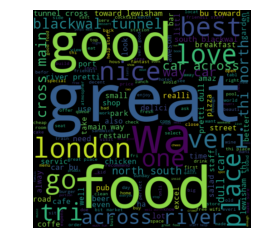

In [570]:
words = [word for sent in df.clean_stem for word in sent]

wordcloud = WordCloud(width=480, height=480, margin=0).generate(' '.join(words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

- Word Cloud for Lemmatization Cleaning

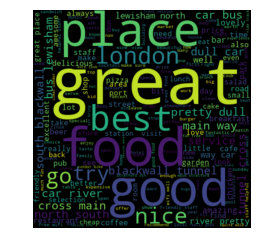

In [560]:
all_text = ' '.join(word for word in df_testing.words)

wordcloud = WordCloud(width=480, height=480, margin=0).generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [239]:
# gensim. look at package to find out about what tags mean what???? and EDA on those tags
lemmatize.func_dict look up!

{}

From looking at the WordClouds I decided that lematisation may be the best option for the preprocessing. Stemming takes away.... the ....lasr bit of the word for normalisation however, it is very difficult to see what that original word once was. Lemitisation...n takes into account the context of the word in the sentece through speech tagging..... stemmnig normalization method

## Extracting Training data from ABSA xml
already labeled data from metashare. Undergo sentiment analysis annually on newviews
http://metashare.ilsp.gr:8080/repository/browse/semeval-2015-absa-restaurant-reviews-train-data/b2ac9c0c198511e4a109842b2b6a04d751e6725f2ab847df88b19ea22cb5cc4a/
https://stackoverflow.com/questions/32504950/training-dataset-for-sentiment-analysis-of-restaurant-reviews 

http://metashare.ilsp.gr:8080/repository/download/b2ac9c0c198511e4a109842b2b6a04d751e6725f2ab847df88b19ea22cb5cc4a/

In [572]:
import pprint as pp
import xml.etree.ElementTree as ET

In [573]:
xml_path = './NLP/ABSA15_RestaurantsTrain2/ABSA-15_Restaurants_Train_Final.xml'

def parse_data_2015(xml_path):
    container = []                                              
    reviews = ET.parse(xml_path).getroot()                      
    
    for review in reviews:  
        sentences = review.getchildren()[0].getchildren()       
        for sentence in sentences:                                  
            sentence_text = sentence.getchildren()[0].text          
            
            try:                                                     
                opinions = sentence.getchildren()[1].getchildren()
            
                for opinion in opinions:                                
                    polarity = opinion.attrib["polarity"]
                    target = opinion.attrib["target"]
        
                    row = {"sentence": sentence_text, "polarity":polarity}   
                    container.append(row)                                                              
                
            except IndexError: 
                row = {"sentence": sentence_text}        
                container.append(row)                                                               
                
    return pd.DataFrame(container)

ABSA_df = parse_data_2015(xml_path)
ABSA_df.head()

/Users/annabopeep/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  
/Users/annabopeep/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  # Remove the CWD from sys.path while we load stuff.
/Users/annabopeep/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  del sys.path[0]


,polarity,sentence
0,negative,Judging from previous posts this used to be a ...
1,negative,"We, there were four of us, arrived at noon - t..."
2,negative,"They never brought us complimentary noodles, i..."
3,negative,The food was lousy - too sweet or too salty an...
4,negative,The food was lousy - too sweet or too salty an...


### Preprocessing Training Data

In [574]:
ABSA_clean = cleaning_normalization(ABSA_df.sentence)
df_training = separate_words_type(ABSA_clean)
df_training.head()

A Jupyter Widget

,words,type
0,judge previous post used be good place not longer,VB JJ NN VB VB JJ NN RB JJ
1,be arrive noon place be empty staff act be imp...,VB VB NN NN VB JJ NN VB VB VB VB RB JJ
2,never bring complimentary noodle ignore repeat...,RB VB JJ NN VB JJ NN NN VB NN NN
3,food be lousy too sweet too salty portion tiny,NN VB JJ RB JJ RB JJ NN JJ
4,food be lousy too sweet too salty portion tiny,NN VB JJ RB JJ RB JJ NN JJ


### Convert Polarity
- Convert polarity sentiment to numeric format 

In [575]:
ABSA_df.polarity.value_counts()

positive    1198
negative     403
neutral       53
Name: polarity, dtype: int64

In [576]:
df_training['polarity']= ABSA_df.polarity.map(lambda x: int(2) if x =='positive' else int(0) if x =='negative' else int(1) if x == 'neutral' else np.nan)
df_training['polarity'].value_counts()

2.0    1198
0.0     403
1.0      53
Name: polarity, dtype: int64

### Drop Null Values
- Because this is my labelled data, I do not want polarity values containing nulls

In [577]:
print 'Original Data:', df_training.shape
print 
print 'Null values Present in df :'
print df_training.isnull().sum()
print 
df_training = df_training.dropna(axis=0)
print 'Null values dropped:', df_training.shape

Original Data: (1849, 3)

Null values Present in df :
words         0
type          0
polarity    195
dtype: int64

Null values dropped: (1654, 3)


- Dropping rows which appear null when opening csv (see at very end)

In [587]:
print df_training.shape
print df_testing.shape

(1654, 3)
(3700, 2)


In [588]:
# drop row 747 training
df_training.drop(df_training.index[747])
print df_training.shape

# drop row 1792 testing
df_testing.drop(df_testing.index[1792])
print df_testing.shape

(1654, 3)
(3700, 2)


In [589]:
df_training.polarity.value_counts()

2.0    1198
0.0     403
1.0      53
Name: polarity, dtype: int64

In [586]:
df_training.mean()

polarity    1.480653
dtype: float64

### Shape of Data 


- boostrapping 
balance the classes 0,1,2
sampling data most normal/closest to mean
sample from data with replacement


- Training > testing 
training = 1654 
testing = 3700

Since the training data is small a resampling method is used to increase its size. This ensures the sample of data is large enough to for the Central Limit Theorem to be true and so confidence intervals can give the boundary of the true mean (mu).


This data will be split with train_tets_split to analyse the model.





In [ ]:
from sklearn import cross_validation
bs = cross_validation.Bootstrap(9, random_state=0)
len(bs)

In [ ]:
def bootstrap(sample, stat_func, iters=1000):
    boots = []
    for i in range(iters):
        random_sample = np.random.choice(sample, replace=True, size=len(sample))
        stat = stat_func(random_sample)
        boots.append(stat)
    return boots

In [542]:
def bootstrap_resample(X, n=None):
    """ Bootstrap resample an array_like
    Parameters
    ----------
    X : array_like
      data to resample
    n : int, optional
      length of resampled array, equal to len(X) if n==None
    Results
    -------
    returns X_resamples
    """
    if isinstance(X, pd.Series):
        X = X.copy()
        X.index = range(len(X.index))
    if n == None:
        n = len(X)
        
    resample_i = np.floor(np.random.rand(n)*len(X)).astype(int)
    X_resample = np.array(X[resample_i])  # TODO: write a test demonstrating why array() is important
    return X_resample

In [546]:
df_train_resampled = pd.DataFrame()#index=df_training.index, columns=df_training.columns, dtype=df_training.dtypes)

for col in df_training.columns:
    df_train_resampled[col] = bootstrap_resample(df_training[col])

In [547]:
df_train_resampled.shape

(1654, 3)

## Training and Testing Data 
- saved as csv

In [590]:
df_training.to_csv('clean_data/training_data.csv', header=True, index=False, encoding='UTF8')
df_training.head()

,words,type,polarity
0,judge previous post used be good place not longer,VB JJ NN VB VB JJ NN RB JJ,0.0
1,be arrive noon place be empty staff act be imp...,VB VB NN NN VB JJ NN VB VB VB VB RB JJ,0.0
2,never bring complimentary noodle ignore repeat...,RB VB JJ NN VB JJ NN NN VB NN NN,0.0
3,food be lousy too sweet too salty portion tiny,NN VB JJ RB JJ RB JJ NN JJ,0.0
4,food be lousy too sweet too salty portion tiny,NN VB JJ RB JJ RB JJ NN JJ,0.0


In [591]:
df_testing.to_csv('clean_data/testing_data.csv', header=True, index=False, encoding='UTF8')
df_testing.head()

,words,type
0,great fun be have everyone aquarium be small f...,JJ NN VB VB NN NN VB JJ NN VB NN VB NN NN VB NN
1,prize draw win family ticket sea life don win ...,NN NN VB NN NN NN NN VB VB RB VB RB VB JJ NN V...
2,be press time head hall coral amazonian exhibi...,VB VB NN NN NN NN JJ NN NN VB RB JJ
3,sea lion show pm pm daily,NN NN VB NN NN RB
4,penguin auditorium be rate not good be honest,JJ NN VB VB RB JJ VB JJ


In [ ]:
# describe data... comment on shape 3420 reviews 6807 words 

### Null Values found preprocessing

### Testing Null

In [322]:
testing = pd.read_csv('./clean_data/testing_data.csv', encoding='utf8')
print testing.isnull().sum()
testing[testing.words.isnull()]

words    1
type     1
dtype: int64


,words,type
1792,NaN,NaN


In [317]:
df_testing.loc[1792]

words    
type     
Name: 1792, dtype: object

In [318]:
df.tips.loc[1792]

u'Merece la pena!!!'

In the testing data null values were found at index 1792. When looking back the raw data is seen to be in a different language and therefore was recognised as forign words in the preprocessing step causing empty entries to be saved to the csv as Null values. 

### Training null
An unexplained null value became aparent when loading the data. This will then be dropped before saving to proceed with the next step

In [403]:
training = pd.read_csv('./clean_data/training_data.csv', encoding='utf8')
print training.isnull().sum()
training[training.words.isnull()]

words       1
type        1
polarity    0
dtype: int64


,words,type,polarity
747,NaN,NaN,2.0


In [404]:
df_training.loc[747, 'words']

'price be cheap compare quality service food'

In [417]:
ABSA_df.loc[749,'sentence']

'We liked it so much, that we will always make it a point to dine here when we visit New York.'

In [406]:
ABSA_clean[747]

['price/NN',
 'be/VB',
 'cheap/RB',
 'compare/VB',
 'quality/NN',
 'service/NN',
 'food/NN']

In [407]:
df_training.loc[747]

words       price be cheap compare quality service food
type                               NN VB RB VB NN NN NN
polarity                                              2
Name: 747, dtype: object